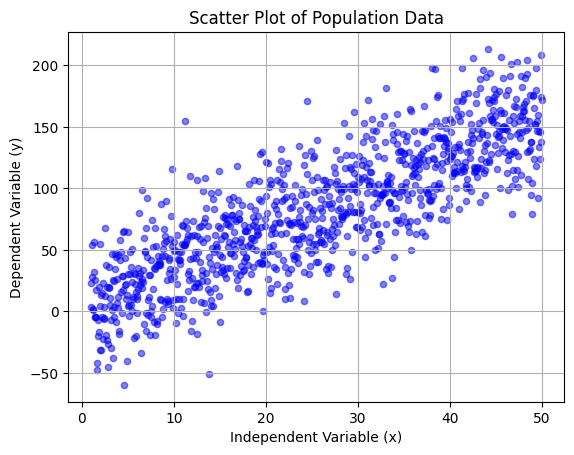

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set a random seed for reproducibility
np.random.seed(42)

# Step 1: Define coefficients for the linear relationship
b0 = 5  # Intercept of the linear equation
b1 = 3  # Slope of the linear equation

# Step 2: Generate independent variable x
# Create an array of 1000 points evenly spaced between 1 and 50
x = np.linspace(1, 50, 1000)

# Step 3: Generate the error term
# Create a normally distributed error term with a mean of 0 and a standard deviation of 30
error = np.random.normal(0, 30, 1000)

# Step 4: Calculate the dependent variable y
# Apply the linear equation: y = b0 + b1 * x + error
y = b0 + b1 * x + error

# Step 5: Create a DataFrame for the population data
population_df = pd.DataFrame({'x': x, 'y': y})

# Step 6: Plot the data
# Create a scatter plot of the population data
population_df.plot.scatter(x='x', y='y', title='Scatter Plot of Population Data', color='blue', alpha=0.5)

# Show the plot
plt.xlabel('Independent Variable (x)')
plt.ylabel('Dependent Variable (y)')
plt.grid(True)
plt.show()

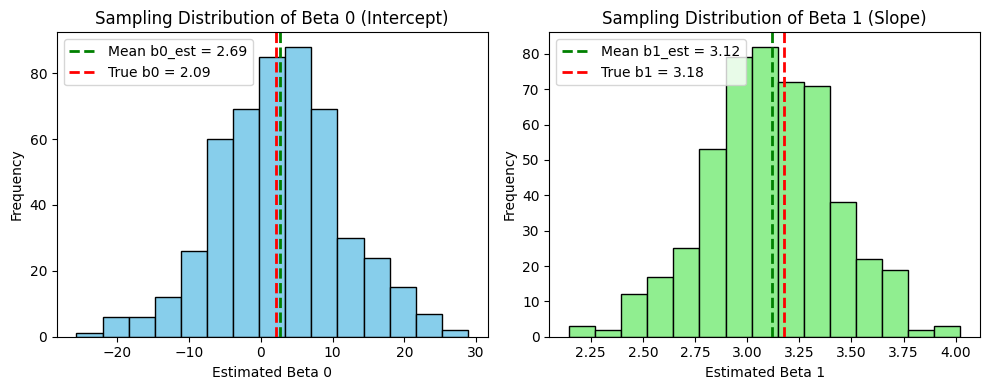

In [10]:
# Set a random seed for reproducibility
np.random.seed(42)

# Step 2: Create 100 samples of size 50 and calculate estimated parameters
sample_size = 50  # Size of each sample
num_samples = 500  # Number of samples to draw

# Lists to store estimated parameters
b0_est = []  # Estimated intercepts
b1_est = []  # Estimated slopes

# Function to calculate the slope (b1)
def calculate_b1(x, y):
    """Calculate the slope (b1) using covariance and variance."""
    return np.cov(x, y)[0, 1] / np.var(x)

# Loop to draw samples and estimate parameters
for _ in range(num_samples):
    # Draw a random sample from the population DataFrame
    sample = population_df.sample(sample_size)
    x, y = sample.x, sample.y
    
    # Calculate the slope (b1) using the formula:
    # b1 = Cov(X, Y) / Var(X)
    b1 = calculate_b1(x, y)
    b1_est.append(b1)
    
    # Calculate the intercept (b0) using the formula:
    # b0 = mean(Y) - b1 * mean(X)
    b0 = np.mean(y) - b1 * np.mean(x)
    b0_est.append(b0)

# Step 3: Show histograms for the estimated parameters
plt.figure(figsize=(10, 4))

# Histogram for beta_0 (intercept) with mean line
mean_b0_est = np.mean(b0_est)  # Calculate mean of estimated b0
plt.subplot(1, 2, 1)
plt.hist(b0_est, bins=15, color='skyblue', edgecolor='black')
plt.axvline(mean_b0_est, color='green', linestyle='dashed', linewidth=2, label=f'Mean b0_est = {mean_b0_est:.2f}')
plt.axvline(b0, color='red', linestyle='dashed', linewidth=2, label=f'True b0 = {b0:.2f}')
plt.title("Sampling Distribution of Beta 0 (Intercept)")
plt.xlabel("Estimated Beta 0")
plt.ylabel("Frequency")
plt.legend()

# Histogram for beta_1 (slope) with mean line
mean_b1_est = np.mean(b1_est)  # Calculate mean of estimated b1
plt.subplot(1, 2, 2)
plt.hist(b1_est, bins=15, color='lightgreen', edgecolor='black')
plt.axvline(mean_b1_est, color='green', linestyle='dashed', linewidth=2, label=f'Mean b1_est = {mean_b1_est:.2f}')
plt.axvline(b1, color='red', linestyle='dashed', linewidth=2, label=f'True b1 = {b1:.2f}')
plt.title("Sampling Distribution of Beta 1 (Slope)")
plt.xlabel("Estimated Beta 1")
plt.ylabel("Frequency")
plt.legend()

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

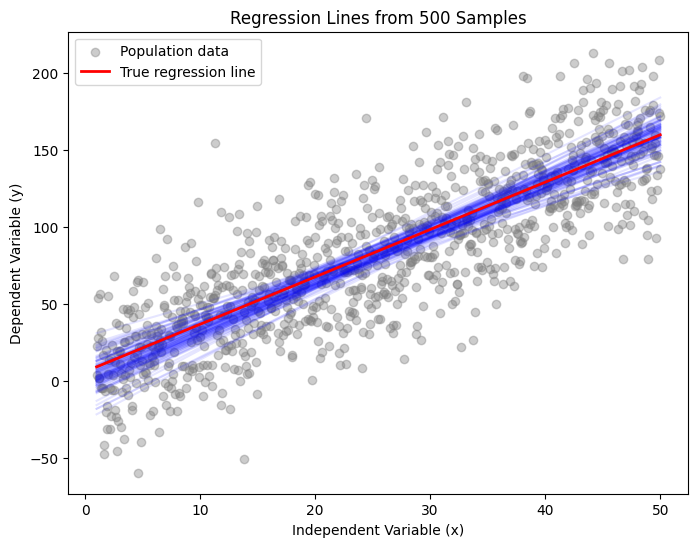

In [11]:
# Step 4: Plotting all regression lines using the estimated parameters

# Set up the figure for plotting
plt.figure(figsize=(8, 6))

# Scatter plot of the population data
plt.scatter(population_df['x'], population_df['y'], alpha=0.4, label="Population data", color='grey')

# Plot regression lines for first 100 sample based on estimated parameters
# Loop through the estimated intercepts (b0) and slopes (b1)
for b0, b1 in zip(b0_est[:100], b1_est[:100]):
    # Calculate the regression line for each sample and plot it
    plt.plot(population_df['x'], b0 + b1 * population_df['x'], color='blue', alpha=1/10)

# Plot the true regression line based on original beta_0 and beta_1
# Note: Use the last estimated b0 and b1 for the true line
plt.plot(population_df['x'], b0 + b1 * population_df['x'], color='red', label="True regression line", linewidth=2)

# Add titles and labels
plt.title("Regression Lines from 500 Samples")
plt.xlabel("Independent Variable (x)")
plt.ylabel("Dependent Variable (y)")
plt.legend()

# Show the plot
plt.show()